In [152]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
plt.rcParams['font.family'] = 'Segoe UI'

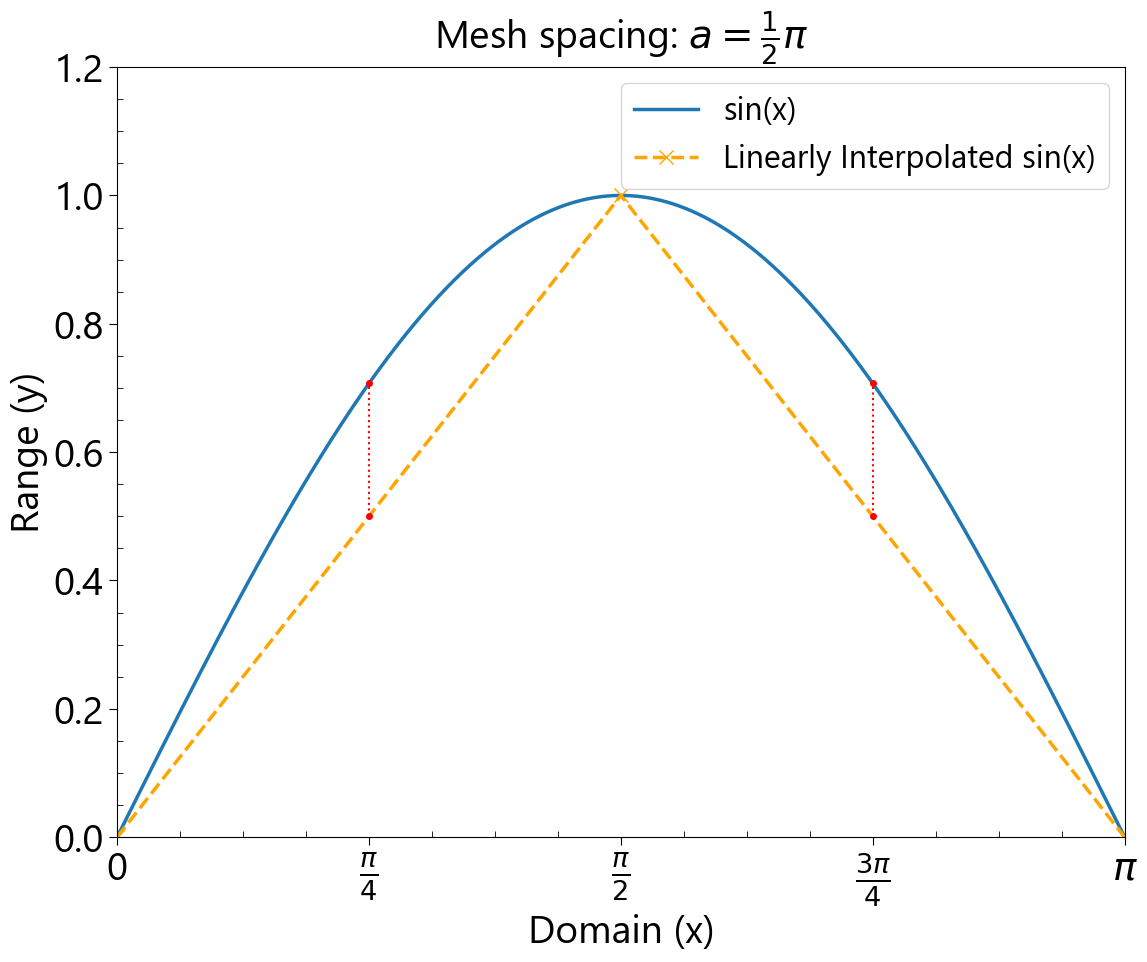

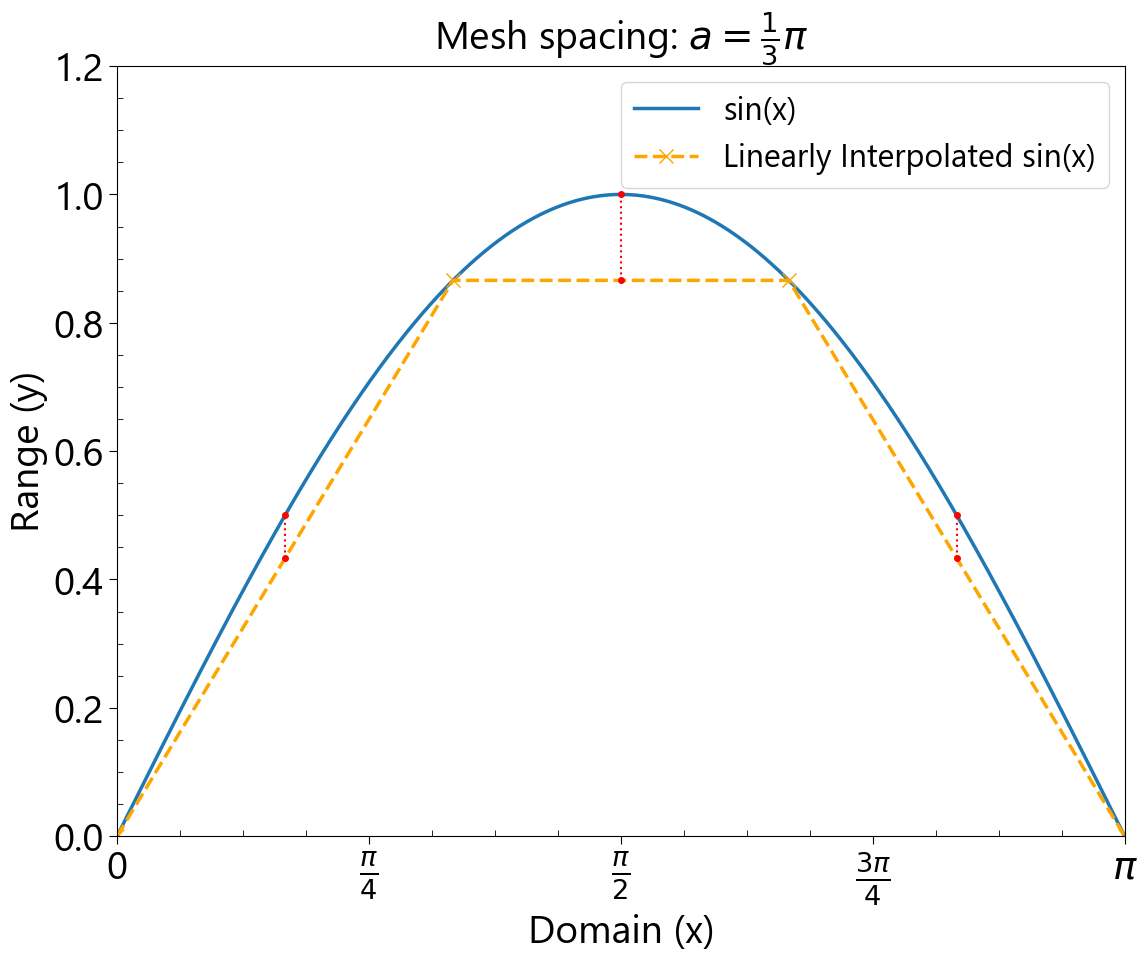

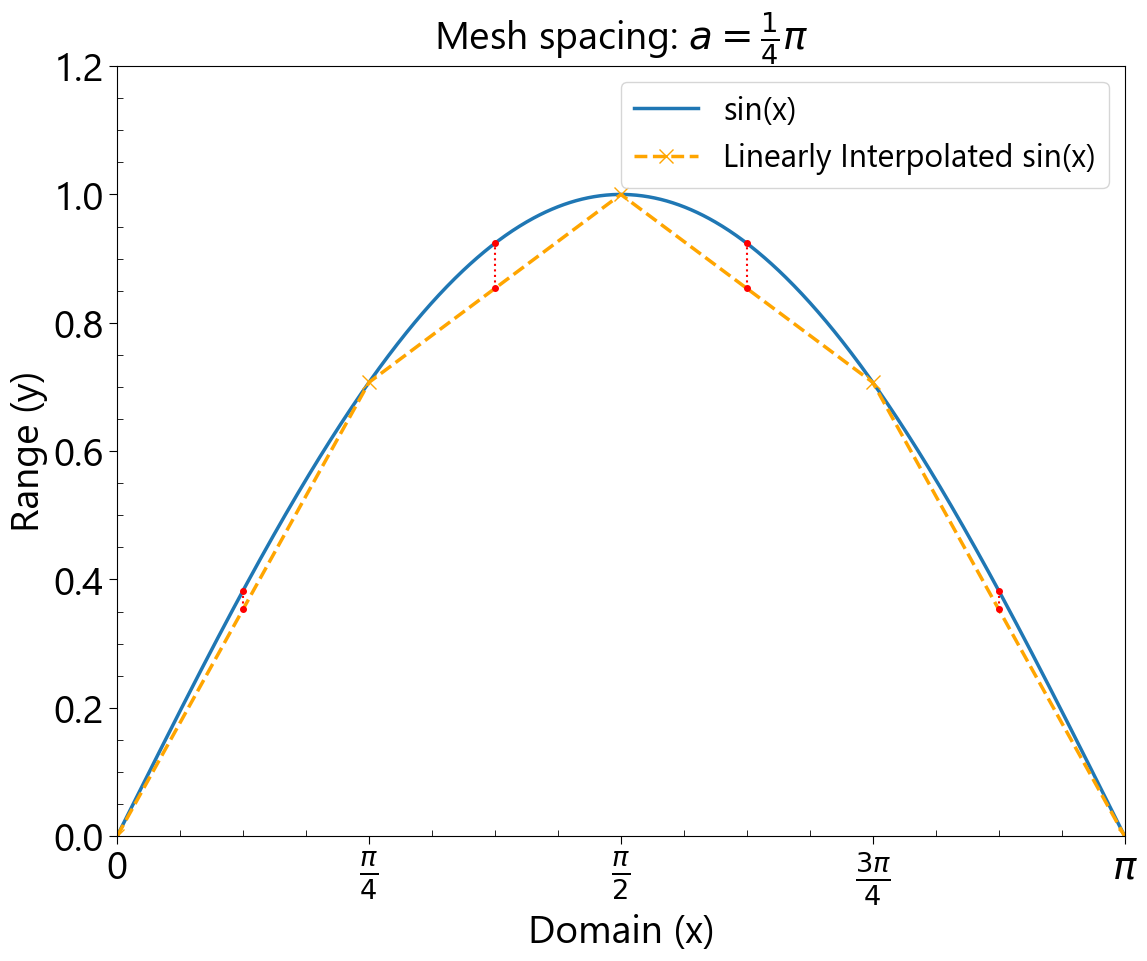

In [191]:
"""
Task 1:
For each value of the mesh spacing a produce a separate plot with two lines:
the exact function, and the function evaluated at the mesh points, but joined
up by straight lines (see Fig. 1.1 for an example of what I mean) 
"""

# Define the function y = sin(x)
def func(x):
    return np.sin(x)

# Define the mesh spacings
mesh_spacings = [np.pi/2, np.pi/3, np.pi/4]

# Define the range of x
x0 = 0
x_end = np.pi

# Create plots for each mesh spacing
for a in mesh_spacings:
    # Generate mesh points
    x_mesh = np.arange(x0, x_end + a, a)
    y_mesh = func(x_mesh)
    
    # Generate mid-points
    x_mid = x_mesh[:-1] + a / 2
    y_mid = func(x_mid)
    
    # Plot the exact function
    x_exact = np.linspace(x0, x_end, 1000)
    y_exact = func(x_exact)
    
    plt.figure()
    plt.plot(x_exact, y_exact, label='y = sin(x)',linewidth=2.5)
    
    # Plot the function evaluated at mesh points and joined by straight lines
    plt.plot(x_mesh, y_mesh, 'x--',linewidth=2.5,markersize=10, color='orange')
    
    
    #plot in terms of pi on the x axis going up in quarter pi increments
    plt.xticks(np.arange(0, np.pi + np.pi/4, np.pi/4), ['0', '$\\frac{\\pi}{4}$', '$\\frac{\\pi}{2}$', '$\\frac{3\\pi}{4}$', '$\\pi$'])

    #start the plot at 0 for the x axis
    plt.xlim(0, np.pi)
    plt.ylim(0,1.2)

    #add title in terms of fractional pi

    a_fraction = Fraction(a / np.pi).limit_denominator()

    #change plot size
    plt.rcParams['figure.figsize'] = [13, 10]

# Create the title with the fraction of pi
    plt.title(f'Mesh spacing: $a = \\frac{{{a_fraction.numerator}}}{{{a_fraction.denominator}}}\\pi$', fontsize=28)



    plt.xlabel('Domain (x)', fontsize=28)
    plt.ylabel('Range (y)',fontsize=28)
    #make labels bold
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    #change legend font size
    
    #change the lable of the second line to be the (f'Mesh spacing $a = \\frac{{{a_fraction.numerator}}}{{{a_fraction.denominator}}}\\pi$')
    plt.legend(['sin(x)', 'Linearly Interpolated sin(x)'], fontsize=23)
   #put the minor ticks inside the plot
    plt.tick_params(which='minor', direction='in')
    plt.minorticks_on()

    #make the minor ticks longer
    plt.tick_params(which='minor', length=4)
    plt.tick_params(which='major', length=6)

    for xm in x_mid:
        # Calculate error at midpoint
        exact_ym = func(xm)
        interpolated_ym = np.interp(xm, x_mesh, y_mesh)
        error = np.abs(exact_ym - interpolated_ym)

        plt.plot([xm, xm], [interpolated_ym, exact_ym], 'ro:', linewidth=1.5, markersize=4)





    plt.grid(False)
    plt.show()

In [ ]:
"""
Task 2:
For each value of the mesh spacing a use linear interpolation to estimate the
values of the function at each mid-point. Produce a table with five columns:
the value of a, the position of the mid-point with the largest error, the value
of the largest error, the position of the mid-point with the smallest error, and
the value of the smallest error. If more than one point has the largest or
smallest error, record the one closest to x = 0. 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# Define the function to interpolate
def f(x):
    return np.sin(x)

# Define the range and mesh spacings
a_values = [np.pi/2, np.pi/3, np.pi/4]
x_range = np.linspace(0, np.pi, 1000)

# Initialize the DataFrame
columns = ['Mesh Spacing (a)', 'x_max_error', 'Largest Error', 'x_min_error', 'Smallest Error']
df = pd.DataFrame(columns=columns)

for a in a_values:
    x_points = np.arange(0, np.pi + a, a)
    mid_points = (x_points[:-1] + x_points[1:]) / 2
    interpolated_values = np.interp(mid_points, x_points, f(x_points))
    actual_values = f(mid_points)
    errors = np.abs(interpolated_values - actual_values)
    
    max_error_index = np.argmax(errors)
    min_error_index = np.argmin(errors)
    
    # Create a new row as a DataFrame
    new_row = pd.DataFrame({
        'Mesh Spacing (a)': [f'{Fraction(a/np.pi).limit_denominator()}π'],
        'x_max_error': [mid_points[max_error_index]],
        'Largest Error': [errors[max_error_index]],
        'x_min_error': [mid_points[min_error_index]],
        'Smallest Error': [errors[min_error_index]]
    })
    
    # Concatenate the new row to the DataFrame
    df = pd.concat([df, new_row], ignore_index=True)

display(df)
